In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
gdf_area = gpd.read_file('N03-20210101_GML/N03-21_210101.shp').fillna('')
gdf_area['N03_007_2'] = gdf_area['N03_007'].copy()
gdf_area['N03_007_3'] = gdf_area['N03_007'].copy()
gdf_area.set_index('N03_007', drop=True, inplace=True)
gdf_area

,N03_001,N03_002,N03_003,N03_004,geometry,N03_007_2,N03_007_3
N03_007,,,,,,,
01101,北海道,石狩振興局,札幌市,中央区,"POLYGON ((141.34233 43.06682, 141.34285 43.066...",01101,01101
01102,北海道,石狩振興局,札幌市,北区,"POLYGON ((141.40839 43.18395, 141.40833 43.183...",01102,01102
01103,北海道,石狩振興局,札幌市,東区,"POLYGON ((141.44707 43.15616, 141.44694 43.155...",01103,01103
01104,北海道,石狩振興局,札幌市,白石区,"POLYGON ((141.46244 43.10010, 141.46265 43.100...",01104,01104
01105,北海道,石狩振興局,札幌市,豊平区,"POLYGON ((141.38463 43.04670, 141.38479 43.046...",01105,01105
...,...,...,...,...,...,...,...
47382,沖縄県,,八重山郡,与那国町,"POLYGON ((122.99033 24.47245, 122.99031 24.472...",47382,47382
47382,沖縄県,,八重山郡,与那国町,"POLYGON ((123.00771 24.47383, 123.00773 24.473...",47382,47382
47382,沖縄県,,八重山郡,与那国町,"POLYGON ((123.00657 24.47437, 123.00658 24.474...",47382,47382


In [3]:
# http://cellmap.rukihena.com/mls44011.json
df_MLS_1 = pd.read_json('mls44011.json').fillna('')
df_MLS_1

,lat,lon,area,cell,unit,range,samples,created,updated
0,35.673958,139.447787,1,51200257,1,23,2,1651282432,1651282432
1,34.684203,135.764690,1,67932160,7,74,3,1651307728,1651307728
2,34.722659,135.726660,1,68311395,17,76,4,1646717700,1646717700
3,34.708910,135.711737,1,68445141,15,37,2,1646717700,1646717700
4,34.620415,135.686617,1,68665311,38,71,3,1649312459,1649312459
...,...,...,...,...,...,...,...,...,...
107673,26.211672,127.674478,65440,219391760,495,97,2,1637397058,1637397058
107674,26.252926,127.710943,65440,219394837,500,27,2,1649833550,1649833550
107675,26.207604,127.698940,65440,219397890,493,187,2,1650355595,1653655222
107676,26.271765,127.728284,65440,219398668,503,59,3,1649833550,1649833550


In [4]:
# ECI(cell)範囲指定
# https://mls.js2hgw.com/wiki/?用語集#a19d1c53
df_MLS_2 = df_MLS_1.query('226492172 >= cell >= 4194305')

In [5]:
# PCI(unit)範囲指定しマクロセルを抽出
# https://mls.js2hgw.com/wiki/?用語集#k2c8cab6
df_MLS_3 = df_MLS_2.query('389 >= unit >= 0')

In [6]:
df_MLS_2.query('area > 49154')

,lat,lon,area,cell,unit,range,samples,created,updated
105517,36.744670,137.077717,49155,50931205,114,48,2,1646737972,1646737972
105518,36.793204,137.044562,49155,51078916,51,0,1,1653155026,1653155026
105519,36.672295,136.912658,49156,50392066,223,626,17,1646737971,1646737971
105520,36.727052,137.005042,49156,50450691,276,140,4,1649759924,1649759924
105521,36.693552,137.114830,49157,50605825,294,76,3,1652909710,1652909710
...,...,...,...,...,...,...,...,...,...
107673,26.211672,127.674478,65440,219391760,495,97,2,1637397058,1637397058
107674,26.252926,127.710943,65440,219394837,500,27,2,1649833550,1649833550
107675,26.207604,127.698940,65440,219397890,493,187,2,1650355595,1653655222
107676,26.271765,127.728284,65440,219398668,503,59,3,1649833550,1649833550


In [7]:
gdf_MLS = gpd.GeoDataFrame(data=df_MLS_3['area'], geometry=gpd.points_from_xy(df_MLS_3.lon, df_MLS_3.lat), crs=6668)

In [8]:
mergedGdf = gpd.overlay(gdf_MLS, gdf_area, how='intersection')

<AxesSubplot:>

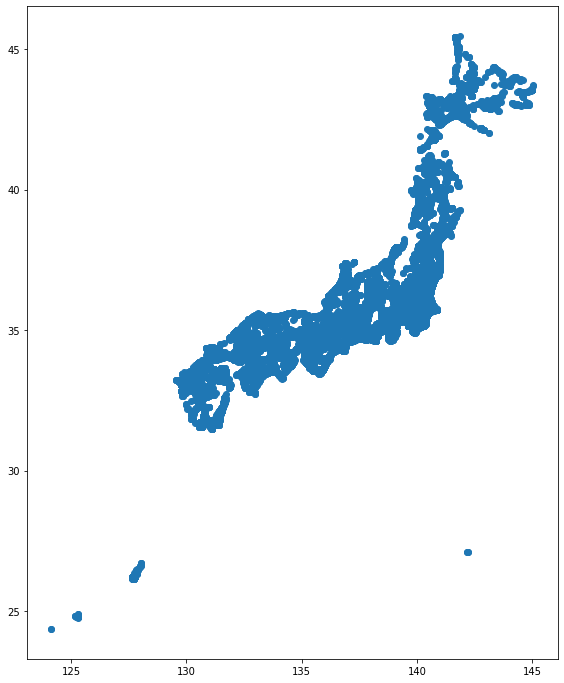

In [9]:
mergedGdf.plot(figsize=(12,12))

In [10]:
df_TAC = pd.crosstab([mergedGdf['N03_007_2'], mergedGdf['N03_001'], mergedGdf['N03_003'], mergedGdf['N03_004'], mergedGdf['N03_007_3']], mergedGdf['area'])
df_TAC

,,,,area,1,70,111,112,113,114,211,212,213,214,...,64288,64320,64384,64416,64512,64960,65024,65056,65152,65440
N03_007_2,N03_001,N03_003,N03_004,N03_007_3,,,,,,,,,,,,,,,,,,,,,
,東京都,,所属未定地,,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01101,北海道,札幌市,中央区,01101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01102,北海道,札幌市,北区,01102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01103,北海道,札幌市,東区,01103,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
01104,北海道,札幌市,白石区,01104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47328,沖縄県,中頭郡,中城村,47328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47329,沖縄県,中頭郡,西原町,47329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47348,沖縄県,島尻郡,与那原町,47348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# MultiIndexを解除
df_TAC.reset_index(inplace=True)
# 'N03_004'が所属未定地の行を削除
df_TAC = df_TAC[df_TAC['N03_004'] != '所属未定地'].copy()
df_TAC.set_index('N03_007_2', inplace=True, drop=True)
df_TAC.sort_values('N03_007_2', inplace=True)
df_TAC

area,N03_001,N03_003,N03_004,N03_007_3,1,70,111,112,113,114,...,64288,64320,64384,64416,64512,64960,65024,65056,65152,65440
N03_007_2,,,,,,,,,,,,,,,,,,,,,
01101,北海道,札幌市,中央区,01101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01102,北海道,札幌市,北区,01102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01103,北海道,札幌市,東区,01103,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
01104,北海道,札幌市,白石区,01104,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01105,北海道,札幌市,豊平区,01105,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47328,沖縄県,中頭郡,中城村,47328,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47329,沖縄県,中頭郡,西原町,47329,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47348,沖縄県,島尻郡,与那原町,47348,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_TAC_2 = df_TAC.copy()

In [13]:
#　最大値の列名をTAC値とする
df_TAC_2['TAC1'] = df_TAC.iloc[:, 4:].idxmax(axis=1)
df_TAC_2

area,N03_001,N03_003,N03_004,N03_007_3,1,70,111,112,113,114,...,64320,64384,64416,64512,64960,65024,65056,65152,65440,TAC1
N03_007_2,,,,,,,,,,,,,,,,,,,,,
01101,北海道,札幌市,中央区,01101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1026
01102,北海道,札幌市,北区,01102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1026
01103,北海道,札幌市,東区,01103,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1026
01104,北海道,札幌市,白石区,01104,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1026
01105,北海道,札幌市,豊平区,01105,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47328,沖縄県,中頭郡,中城村,47328,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49153
47329,沖縄県,中頭郡,西原町,47329,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49153
47348,沖縄県,島尻郡,与那原町,47348,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49153


In [14]:
# sample数
df_TAC_2['samples1'] = df_TAC.iloc[:, 4:].max(axis=1)
df_TAC_2

area,N03_001,N03_003,N03_004,N03_007_3,1,70,111,112,113,114,...,64384,64416,64512,64960,65024,65056,65152,65440,TAC1,samples1
N03_007_2,,,,,,,,,,,,,,,,,,,,,
01101,北海道,札幌市,中央区,01101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1026,147
01102,北海道,札幌市,北区,01102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1026,118
01103,北海道,札幌市,東区,01103,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1026,139
01104,北海道,札幌市,白石区,01104,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1026,99
01105,北海道,札幌市,豊平区,01105,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1026,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47328,沖縄県,中頭郡,中城村,47328,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49153,4
47329,沖縄県,中頭郡,西原町,47329,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49153,16
47348,沖縄県,島尻郡,与那原町,47348,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49153,3


In [15]:
# TACとサンプル数を取得
def area_sample(code, n):

    tac = df_TAC[df_TAC['N03_007_3'] == code].T.iloc[4:].sort_values(code, ascending=False).iloc[[n]].index[0] # 任意の1行

    sample = df_TAC[df_TAC['N03_007_3'] == code].T.iloc[4:].sort_values(code, ascending=False).iat[n,0] # 任意のサンプル数

    return pd.Series([tac, sample])

In [16]:
# 2番目に多いTACとサンプル数を取得
df_TAC_2[['TAC2', 'samples2']] = df_TAC['N03_007_3'].apply(area_sample, args=(1,))
df_TAC_2

area,N03_001,N03_003,N03_004,N03_007_3,1,70,111,112,113,114,...,64512,64960,65024,65056,65152,65440,TAC1,samples1,TAC2,samples2
N03_007_2,,,,,,,,,,,,,,,,,,,,,
01101,北海道,札幌市,中央区,01101,0,0,0,0,0,0,...,0,0,0,0,0,0,1026,147,1,0
01102,北海道,札幌市,北区,01102,0,0,0,0,0,0,...,0,0,0,0,0,0,1026,118,1027,1
01103,北海道,札幌市,東区,01103,0,0,0,0,0,0,...,0,0,0,0,0,0,1026,139,8229,3
01104,北海道,札幌市,白石区,01104,0,0,0,0,0,0,...,0,0,0,0,0,0,1026,99,1,0
01105,北海道,札幌市,豊平区,01105,0,0,0,0,0,0,...,0,0,0,0,0,0,1026,85,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47328,沖縄県,中頭郡,中城村,47328,0,0,0,0,0,0,...,0,0,0,0,0,0,49153,4,1,0
47329,沖縄県,中頭郡,西原町,47329,0,0,0,0,0,0,...,0,0,0,0,0,0,49153,16,1,0
47348,沖縄県,島尻郡,与那原町,47348,0,0,0,0,0,0,...,0,0,0,0,0,0,49153,3,1,0


In [17]:
# 3番目に多いTACとサンプル数を取得
df_TAC_2[['TAC3', 'samples3']] = df_TAC['N03_007_3'].apply(area_sample, args=(2,))
df_TAC_2

area,N03_001,N03_003,N03_004,N03_007_3,1,70,111,112,113,114,...,65024,65056,65152,65440,TAC1,samples1,TAC2,samples2,TAC3,samples3
N03_007_2,,,,,,,,,,,,,,,,,,,,,
01101,北海道,札幌市,中央区,01101,0,0,0,0,0,0,...,0,0,0,0,1026,147,1,0,38280,0
01102,北海道,札幌市,北区,01102,0,0,0,0,0,0,...,0,0,0,0,1026,118,1027,1,1,0
01103,北海道,札幌市,東区,01103,0,0,0,0,0,0,...,0,0,0,0,1026,139,8229,3,64288,1
01104,北海道,札幌市,白石区,01104,0,0,0,0,0,0,...,0,0,0,0,1026,99,1,0,38280,0
01105,北海道,札幌市,豊平区,01105,0,0,0,0,0,0,...,0,0,0,0,1026,85,1,0,38280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47328,沖縄県,中頭郡,中城村,47328,0,0,0,0,0,0,...,0,0,0,0,49153,4,1,0,38152,0
47329,沖縄県,中頭郡,西原町,47329,0,0,0,0,0,0,...,0,0,0,0,49153,16,1,0,38152,0
47348,沖縄県,島尻郡,与那原町,47348,0,0,0,0,0,0,...,0,0,0,0,49153,3,1,0,38152,0


In [18]:
df_TAC_3 = df_TAC_2[['N03_001', 'N03_003', 'N03_004', 'TAC1', 'samples1', 'TAC2', 'samples2', 'TAC3', 'samples3']].copy()

In [19]:
# samplesが 1 件以下を抽出
df_TAC_3.query('samples1 <= 1')
# ミスデータ
# 01334	北海道	上磯郡	木古内町	2049	1
# 04444	宮城県	加美郡	色麻町	2311	1	
# 08521	茨城県	結城郡	八千代町	211	1
# 39341	高知県	長岡郡	本山町	49604	1	
# 42214	長崎県		南島原市	45057	1

area,N03_001,N03_003,N03_004,TAC1,samples1,TAC2,samples2,TAC3,samples3
N03_007_2,,,,,,,,,
01334,北海道,上磯郡,木古内町,2049,1,38152,0,38278,0
01361,北海道,檜山郡,江差町,1025,1,1,0,38280,0
01393,北海道,寿都郡,黒松内町,1025,1,1,0,38280,0
01395,北海道,虻田郡,ニセコ町,1025,1,1,0,38280,0
01399,北海道,虻田郡,京極町,1025,1,1,0,38280,0
01404,北海道,古宇郡,神恵内村,1025,1,1,0,38280,0
01434,北海道,雨竜郡,秩父別町,1028,1,1,0,38280,0
01436,北海道,雨竜郡,雨竜町,1027,1,1,0,38280,0
01438,北海道,雨竜郡,沼田町,1028,1,1,0,38280,0


In [20]:
df_TAC_3.drop(index=['01334', '04444', '08521', '39341'], inplace=True)

In [21]:
df_TAC_3.to_csv('TAC_Rakuten.csv', index=True)

In [22]:
df_TAC_3['N03_007_3'] = df_TAC_3.index

In [23]:
# keyを'N03_007' 都道府県コードでマージ
gdf_TAC = gdf_area.merge(df_TAC_3, left_on='N03_007_2', right_on='N03_007_3')
gdf_TAC

,N03_001_x,N03_002,N03_003_x,N03_004_x,geometry,N03_007_2,N03_007_3_x,N03_001_y,N03_003_y,N03_004_y,TAC1,samples1,TAC2,samples2,TAC3,samples3,N03_007_3_y
0,北海道,石狩振興局,札幌市,中央区,"POLYGON ((141.34233 43.06682, 141.34285 43.066...",01101,01101,北海道,札幌市,中央区,1026,147,1,0,38280,0,01101
1,北海道,石狩振興局,札幌市,北区,"POLYGON ((141.40839 43.18395, 141.40833 43.183...",01102,01102,北海道,札幌市,北区,1026,118,1027,1,1,0,01102
2,北海道,石狩振興局,札幌市,東区,"POLYGON ((141.44707 43.15616, 141.44694 43.155...",01103,01103,北海道,札幌市,東区,1026,139,8229,3,64288,1,01103
3,北海道,石狩振興局,札幌市,白石区,"POLYGON ((141.46244 43.10010, 141.46265 43.100...",01104,01104,北海道,札幌市,白石区,1026,99,1,0,38280,0,01104
4,北海道,石狩振興局,札幌市,豊平区,"POLYGON ((141.38463 43.04670, 141.38479 43.046...",01105,01105,北海道,札幌市,豊平区,1026,85,1,0,38280,0,01105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92037,沖縄県,,島尻郡,八重瀬町,"POLYGON ((127.74956 26.11951, 127.74955 26.119...",47362,47362,沖縄県,島尻郡,八重瀬町,49153,12,1,0,38152,0,47362
92038,沖縄県,,島尻郡,八重瀬町,"POLYGON ((127.75026 26.11952, 127.75024 26.119...",47362,47362,沖縄県,島尻郡,八重瀬町,49153,12,1,0,38152,0,47362
92039,沖縄県,,島尻郡,八重瀬町,"POLYGON ((127.74970 26.11975, 127.74971 26.119...",47362,47362,沖縄県,島尻郡,八重瀬町,49153,12,1,0,38152,0,47362
92040,沖縄県,,島尻郡,八重瀬町,"POLYGON ((127.76445 26.12312, 127.76447 26.123...",47362,47362,沖縄県,島尻郡,八重瀬町,49153,12,1,0,38152,0,47362


In [24]:
gdf_simple = gdf_TAC.copy()
# simplify参考　https://shapely.readthedocs.io/en/latest/manual.html#object.simplify
gdf_simple['geometry'] = gdf_simple['geometry'].simplify(tolerance=0.00085)

In [25]:
# aggfunc='sum'にすると飛び地を含む場合に二重計上される
gdf_dissolve = gdf_simple.dissolve(by='TAC1', as_index=False)
gdf_dissolve

,TAC1,geometry,N03_001_x,N03_002,N03_003_x,N03_004_x,N03_007_2,N03_007_3_x,N03_001_y,N03_003_y,N03_004_y,samples1,TAC2,samples2,TAC3,samples3,N03_007_3_y
0,111,"MULTIPOLYGON (((139.65035 35.59266, 139.65629 ...",東京都,,,品川区,13109,13109,東京都,,品川区,222,212,178,112,5,13109
1,112,"MULTIPOLYGON (((139.69504 35.40754, 139.69209 ...",東京都,,,大田区,13111,13111,東京都,,大田区,356,111,268,5767,4,13111
2,113,"POLYGON ((139.60326 35.68065, 139.59309 35.682...",東京都,,,世田谷区,13112,13112,東京都,,世田谷区,549,111,258,55555,11,13112
3,114,"POLYGON ((139.67910 35.73534, 139.67810 35.730...",埼玉県,,さいたま市,中央区,11105,11105,埼玉県,さいたま市,中央区,42,311,14,38152,0,11105
4,211,"POLYGON ((139.78259 35.69472, 139.77043 35.689...",東京都,,,千代田区,13101,13101,東京都,,千代田区,248,214,244,212,45,13101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,48129,"MULTIPOLYGON (((129.68804 31.62138, 129.68813 ...",鹿児島県,,,阿久根市,46206,46206,鹿児島県,,阿久根市,19,1,0,38152,0,46206
138,48130,"MULTIPOLYGON (((130.55880 31.34381, 130.55886 ...",鹿児島県,,,鹿児島市,46201,46201,鹿児島県,,鹿児島市,58,17158,5,48129,4,46201
139,48131,"MULTIPOLYGON (((131.11850 31.42512, 131.11860 ...",鹿児島県,,,志布志市,46221,46221,鹿児島県,,志布志市,11,1,0,38152,0,46221
140,49153,"MULTIPOLYGON (((127.66377 26.08049, 127.66375 ...",沖縄県,,,那覇市,47201,47201,沖縄県,,那覇市,177,1,0,38152,0,47201


In [26]:
gdf_TAC_2 = gdf_dissolve[['N03_001_x', 'TAC1', 'TAC2', 'TAC3', 'geometry']].copy()

In [27]:
# サンプル数
gdf_TAC_2['samples1'] = gdf_TAC_2['TAC1'].apply(lambda x: df_TAC_3[df_TAC_3['TAC1'] == int(x)]['samples1'].sum())
gdf_TAC_2['samples2'] = gdf_TAC_2['TAC2'].apply(lambda x: df_TAC_3[df_TAC_3['TAC2'] == int(x)]['samples2'].sum())
gdf_TAC_2['samples3'] = gdf_TAC_2['TAC3'].apply(lambda x: df_TAC_3[df_TAC_3['TAC3'] == int(x)]['samples3'].sum())
gdf_TAC_2

,N03_001_x,TAC1,TAC2,TAC3,geometry,samples1,samples2,samples3
0,東京都,111,212,112,"MULTIPOLYGON (((139.65035 35.59266, 139.65629 ...",872,382,10
1,東京都,112,111,5767,"MULTIPOLYGON (((139.69504 35.40754, 139.69209 ...",1204,751,4
2,東京都,113,111,55555,"POLYGON ((139.60326 35.68065, 139.59309 35.682...",1116,751,11
3,埼玉県,114,311,38152,"POLYGON ((139.67910 35.73534, 139.67810 35.730...",1083,362,0
4,東京都,211,214,212,"POLYGON ((139.78259 35.69472, 139.77043 35.689...",385,693,52
...,...,...,...,...,...,...,...,...
137,鹿児島県,48129,1,38152,"MULTIPOLYGON (((129.68804 31.62138, 129.68813 ...",167,2,0
138,鹿児島県,48130,17158,48129,"MULTIPOLYGON (((130.55880 31.34381, 130.55886 ...",58,5,7
139,鹿児島県,48131,1,38152,"MULTIPOLYGON (((131.11850 31.42512, 131.11860 ...",11,2,0
140,沖縄県,49153,1,38152,"MULTIPOLYGON (((127.66377 26.08049, 127.66375 ...",439,2,0


In [28]:
# 奈良県を確認
print(gdf_TAC_2[gdf_TAC_2['TAC1'] == 30721]['samples1'])
print(gdf_TAC_2[gdf_TAC_2['TAC1'] == 30722]['samples1'])

94    1004
Name: samples1, dtype: int64
95    529
Name: samples1, dtype: int64


In [29]:
# intだとfolium.popupでカンマ表記になるので文字列へ変換
gdf_TAC_2['TAC1'] = gdf_TAC_2['TAC1'].astype(str)
gdf_TAC_2['TAC2'] = gdf_TAC_2['TAC2'].astype(str)
gdf_TAC_2['TAC3'] = gdf_TAC_2['TAC3'].astype(str)

In [30]:
# 重複チェック
gdf_TAC_2[gdf_TAC_2.duplicated()]

,N03_001_x,TAC1,TAC2,TAC3,geometry,samples1,samples2,samples3


In [31]:
gdf_TAC_2.to_file('TAC_Rakuten.geojson', driver='GeoJSON', index=False)